The 538 problem from 20/11/2020 is to consider a circular table of 20 people, where a jar is sauce is randomly passed to the left or or right by each person, until everyone has seen the sauce jar. Which person is most likely to see the jar last?

First thoughts:
1. the problem is small enough Monte Carlo, so we can pretty easily just simulate it and see what the answer is, before working it out analytically
2. my first gut feeling is that the answer can't be the person opposite the start, because this would require the jar goes halfway round the circle, then switches course and goes all the way around back
3. similarly, the people directly next to you have a 50% chance of being hit immediately, but if they are not then being last isn't crazy, because this is just travelling round the circle in one direction

So: let's quickly simulate it and see what the answer is. Then we can do the hard part and work out why. This is just a quick and dirty direct simulation, with 10000 trials

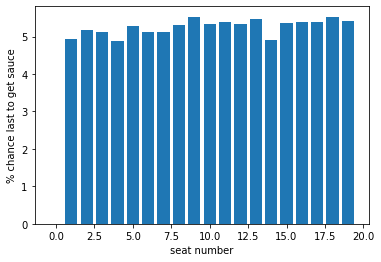

In [70]:
%matplotlib inline 

import matplotlib.pyplot as plt
import numpy as np
import random

nSeats = 20
trials = 10000

results = np.zeros(nSeats)

for n in range(trials):
    seats = np.zeros(nSeats)
    saucePos = 0
    seats[0] = 1

    while seats.sum() < nSeats-1:
        if random.random() > 0.5:
            direction = 1
        else:
            direction = -1
        saucePos = (saucePos + direction) % nSeats
        seats[saucePos] = 1
    results[np.where(seats==0)[0][0]] += 1
    
plt.bar(np.arange(nSeats), results / trials * 100)
plt.ylabel('% chance last to get sauce')
plt.xlabel('seat number')
plt.show()


Ok. So that pretty convincingly tells us that every diner has an equal chance of being last. But why?

First we'll try and answer the much simpler case of a table with 4 people at it. Now there are only three possible end positions to consider, and two of them are identical by symmetry. So there are two cases to consider:
# 1. Adjacent diner is last
In this case, the simplest route the sauce could have taken is to be passed to left twice, which leaves only the diner to your right without sauce. The path is $(0\rightarrow1\rightarrow2)$. Since each of these left passings have a 50% chance, we get the probability of this pathway, where diner 3 is last after 2 passes as $P(3, 2) = (\frac{1}{2})^2$,.

However, this is not the only path possible. Instead the sauce could be passed left to diner 1, back to the right, and then leftwards to diner 2. The path is $(0\rightarrow1\rightarrow0\rightarrow1\rightarrow2)$. This 4 move path has a probability $P(3, 4) = (\frac{1}{2})^4$. We could of course circle more than once, so it's now pretty easy to see that in general $P(3, n) = \frac{1}{2}^n$. Hence, the total probability of diner 3 being last is 
$$P(3) =\sum_{n=0}^{\infty} (\frac{1}{2})^{2n}=\frac{1}{3}$$

So there is a 1/3 chance that diner 3 is last. By symmetry, there must also be a 1/3 chance of diner 1 being last. Which means that to make the probabilities add up there must also be a 1/3 chance of diner being last. Hence, for a four dinner table, we have proven that every diner is equally likely to be last. For the sake of completeness, we'll also do the caculations for diner 2 being last as well.

# 2. Opposite diner is last
The argument here is almost the same as for adjacent, but with the difference that there are now two mirrored paths we can take. The simplest path is $(0\rightarrow1\rightarrow0\rightarrow3)$, or if we went the other way to begin with $(0\rightarrow3\rightarrow0\rightarrow1)$. The math will thus be exactly the same as for the adjacent case, but the minimum number of moves is now three, and we have to double our answer to ccount for the mirror symmetry:
$$P(2) =2\sum_{n=0}^{\infty} (\frac{1}{2})^{2n+1}=\frac{1}{3}$$

Once again, we get a probability of 1/3. So in conclusion, we've proven that for 4 diners, the probability is equal for any of them being last. However, life becomes a lot harder when we try to scale this to 20 diners, because now we have to worry about working out exactly how many backtracking loops are invloved, which is not simple. So far I haven't worked out a nice generating function for the paths where $n>4$. One exists though, I'm sure of this. And the answer it finally gives will be equal probability, at least.